In [1]:
import numpy as np
import imageio
import matplotlib.pyplot as plt
import scipy.ndimage as nd
import colorsys

In [2]:
rgb_hsv = np.vectorize(colorsys.rgb_to_hsv)
hsv_rgb = np.vectorize(colorsys.hsv_to_rgb)
rgb_yiq = np.vectorize(colorsys.rgb_to_yiq)
yiq_rgb = np.vectorize(colorsys.yiq_to_rgb)

### NO. 1

Resolusi intensitas adalah jumlah banyaknya level grayscale dalam setiap piksel greyscale image.


Resolusi spasial adalah resolusi gambar secara ruang, misal: 240x240 berarti 240 pixel x 240 pixel.
Notasi operator : 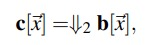
   

In [3]:
def GeoFun( outcoord ):
  a = 20*np.cos( outcoord[0]/20. )+outcoord[0]
  b = 20*np.cos( outcoord[1]/20. )+outcoord[1]
  return a,b

### NO. 2

In [ ]:
a2 = imageio.imread('bird.jpeg')/255

a2_r= a2[:, :, 0]
a2_s= a2[:, :, 2]

m2= ((a2_s/(1.1-a2_r))>0.5)*a2_s/(1.1-a2_r)

t2_h, t2_s, t2_v= rgb_hsv(a2[:, :, 0], a2[:, :, 1], a2[:, :, 2])

b2= np.dstack(((t2_h*m2), t2_s, t2_v))

n2_r, n2_g, n2_b= hsv_rgb(b2[:, :, 0], b2[:, :, 1], b2[:, :, 2])

n2= np.dstack((n2_r, n2_g, n2_b))

plt.imshow(n2)


###  NO. 3

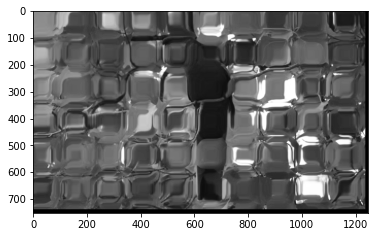

In [7]:
a3= imageio.imread('bird.jpeg')/255

b3= imageio.imread('bird.jpeg', as_gray=True).astype(np.uint8)

c3= nd.geometric_transform(b3, GeoFun)

temp= b3 & 0x80
d3= 1-(temp[4]>0)*temp[4]>0
g3= c3*d3

plt.imshow(g3, cmap="gray")

### NO. 4

$$\mathrm{\mathbf{a}}[\vec{x}] = Y\left(\mathrm{'banana.jpeg'}\right)$$

$$\mathrm{\mathbf{b}}[\vec{x}] = \mathcal{L}_{YIQ}\mathrm{\mathbf{a}}[\vec{x}] $$

$$\mathrm{\mathbf{c1}} = 
G_{10}\begin{Bmatrix}
\varnothing\\
\varnothing \\
1 \\
\end{Bmatrix}\mathrm{\mathbf{b}}[\vec{x}] -
G_{10}\begin{Bmatrix}
\varnothing\\
1 \\
\varnothing \\
\end{Bmatrix}\mathrm{\mathbf{b}}[\vec{x}] +
\begin{Bmatrix}
1 \\
\varnothing\\
\varnothing \\
\end{Bmatrix}\mathrm{\mathbf{b}}[\vec{x}] $$

$$\mathrm{\mathbf{c2}} = 
G_{4}\begin{Bmatrix}
\varnothing\\
1 \\
\varnothing \\
\end{Bmatrix}\mathrm{\mathbf{b}}[\vec{x}] $$

$$\mathrm{\mathbf{c3}} = 
G_{6}\begin{Bmatrix}
\varnothing\\
\varnothing \\
1 \\
\end{Bmatrix}\mathrm{\mathbf{b}}[\vec{x}] $$

$$\mathrm{\mathbf{c}}[\vec{x}] = 
\begin{Bmatrix}
\mathrm{\mathbf{c1}}\\
\mathrm{\mathbf{c2}} \\
\mathrm{\mathbf{c3}} \\
\end{Bmatrix}\mathrm{\mathbf{b}}[\vec{x}] $$

$$\mathrm{\mathbf{d}}[\vec{x}] = \mathcal{L}_{RGB}\mathrm{\mathbf{c}}[\vec{x}] $$

$$\mathrm{\mathbf{d}}[\vec{x}] =
\begin{Bmatrix}
\varnothing\\
\varnothing \\
1 \\
\end{Bmatrix}\mathrm{\mathbf{d}}[\vec{x}] - 
\begin{Bmatrix}
\varnothing\\
\varnothing \\
1 \\
\end{Bmatrix}\mathrm{\mathbf{a}}[\vec{x}] $$